In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from matplotlib.colors import ListedColormap
dots_cmap = ListedColormap(['#e20c32','#1b80e8']) #,,])'#599062'
plt.register_cmap(cmap=dots_cmap)
colors = ['#1b80e8','#599062','#e20c32']

In [32]:
df = pd.read_csv('Birch3.csv',sep=";")


,X,Y
0,118879,887164.0
1,118415,867117.0
2,118274,902572.0
3,117577,883724.0
4,117036,884249.0


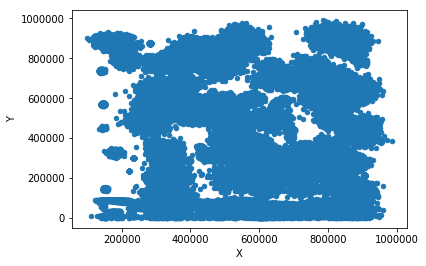

In [15]:
df.plot(kind="scatter", x="X", y="Y") 

In [39]:
df[df.isna().any(axis=1)]

,X,Y
9903,310611,NaN


In [42]:
df=df.drop(9903)

In [89]:
db = DBSCAN(eps=10000, min_samples=20).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [90]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
noisy_points = db.labels_==-1
cluster_points = ~noisy_points
print("Number of clusters = %d"%n_clusters_)
print("Number of cluster points = %d"%sum(cluster_points))
print("Number of noisy points = %d"%sum(noisy_points))

Number of clusters = 46
Number of cluster points = 97225
Number of noisy points = 2774


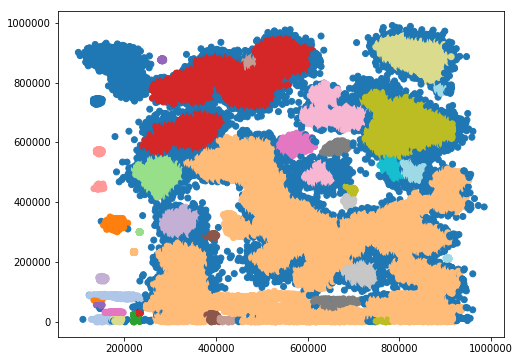

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(df['X'],df['Y'],c=labels,cmap=plt.get_cmap('tab20'))